In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [34]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [35]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
# Drop irrelevant columns
df.drop(columns=["ID", "ZIP Code"], inplace=True)

In [37]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_16112\2624010610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Personal Loan"], palette="viridis")


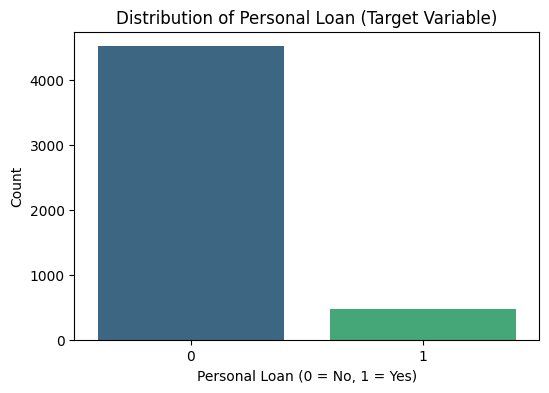

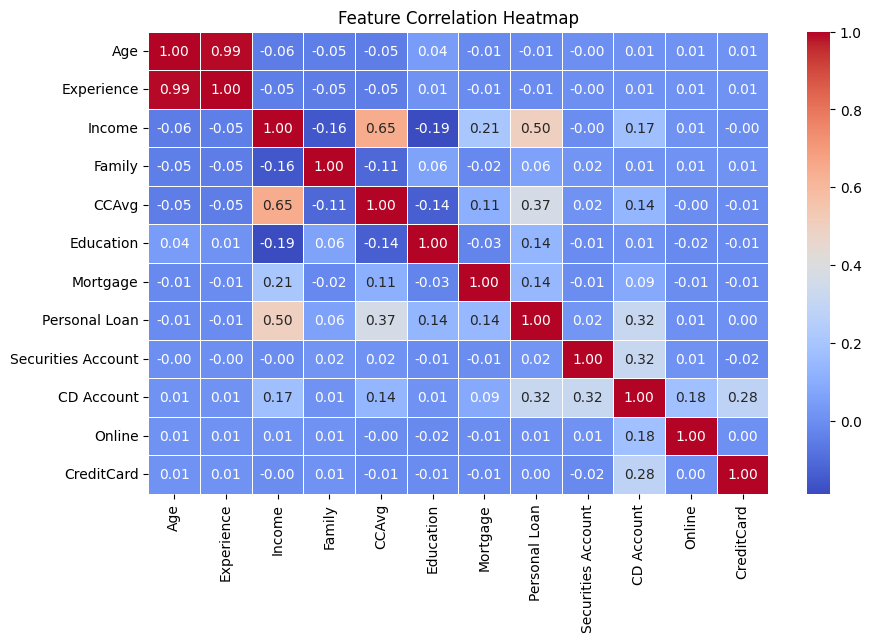

In [38]:
# Data visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Personal Loan"], palette="viridis")
plt.title("Distribution of Personal Loan (Target Variable)")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:
# Define features and target variable
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"]

In [40]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(class_weight="balanced" , random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [42]:
# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [43]:
# Evaluate performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9850
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.89      0.97      0.93        96

    accuracy                           0.98      1000
   macro avg       0.94      0.98      0.96      1000
weighted avg       0.99      0.98      0.99      1000



In [44]:
# Train a pruned Decision Tree with max depth and min samples split
dt_pruned = DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)

In [45]:
# Predictions with pruned tree
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

In [46]:
# Evaluate pruned model
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)
print(f"Training Accuracy after Pruning: {train_acc_pruned:.4f}")
print(f"Test Accuracy after Pruning: {test_acc_pruned:.4f}")
print("Classification Report after Pruning:\n", classification_report(y_test, y_test_pred_pruned))

Training Accuracy after Pruning: 0.9878
Test Accuracy after Pruning: 0.9860
Classification Report after Pruning:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.90      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000



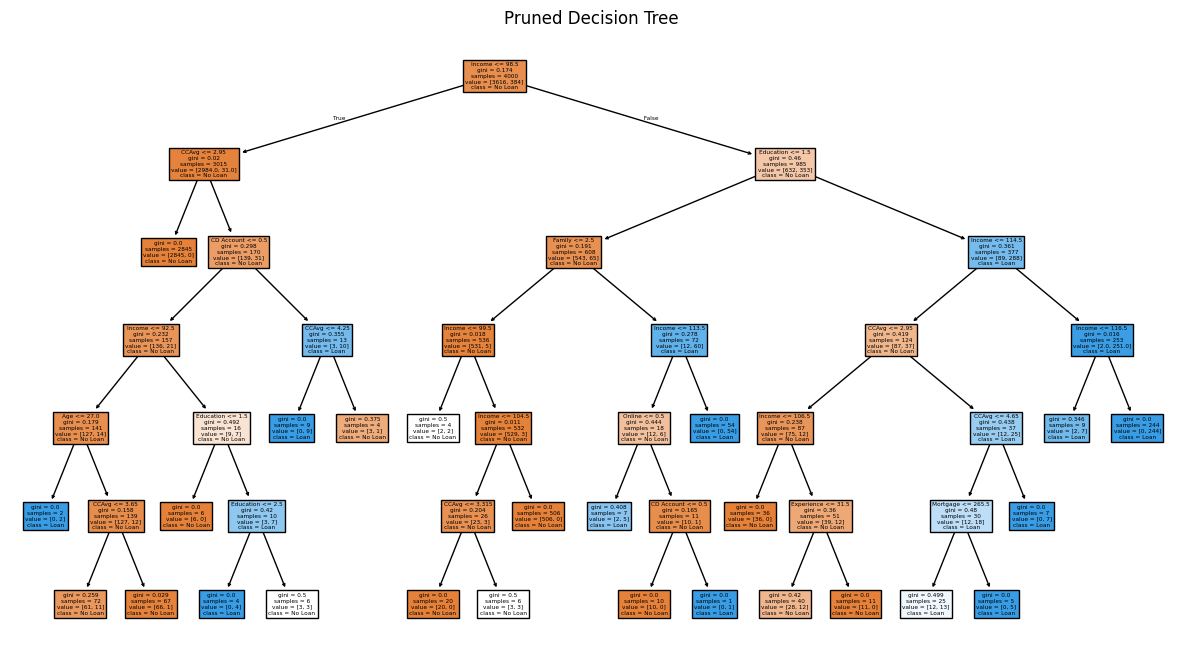

In [47]:
# Visualize the pruned Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_pruned, feature_names=X.columns, class_names=["No Loan", "Loan"], filled=True)
plt.title("Pruned Decision Tree")
plt.show()